# IKM Semestral

I am continuing the work of
https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models

I shall fine tune their model to see if it can be improved

## Data import

In [1]:
import kagglehub
from sklearn.exceptions import DataConversionWarning

_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')
print(_path)

/home/meowxiik/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [2]:
from pathlib import Path
import pandas as pd

data_df = pd.read_csv(Path(_path) / "creditcard.csv")

target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [3]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Their model reproduction

In [4]:
TEST_SIZE=0.2
VALID_SIZE=0.1
RANDOM_STATE=41

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced
         }

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
VERBOSE_EVAL = 50 #Print out metric result

In [6]:
import lightgbm as lgb

dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

evals_results = {}

model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dvalid],
                  valid_names=['train','valid'],
                  num_boost_round=MAX_ROUNDS,
                  callbacks=[lgb.early_stopping(stopping_rounds=2*EARLY_STOP)],
                  feval=None)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	train's auc: 0.968283	valid's auc: 0.978179


In [7]:
model

In [8]:
model.best_score

defaultdict(collections.OrderedDict,
            {'train': OrderedDict([('auc', np.float64(0.9682825019492866))]),
             'valid': OrderedDict([('auc', np.float64(0.978178537470096))])})

In [9]:
from ikm_fraud_finetuning.core.paths import PATH_ARTIFACTS
model.save_model(PATH_ARTIFACTS / "model.txt")

## Fine Tuning

In [10]:
import lightgbm as lgb
from sklearn import metrics

class AUCLGBMClassifier(lgb.LGBMClassifier):
    def score(self, X, y, sample_weight=None):
        y_score = self.predict_proba(X)[:, 1]
        return metrics.roc_auc_score(y, y_score, sample_weight=sample_weight)

classifier = AUCLGBMClassifier(**params)

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2]	valid_0's auc: 0.978179


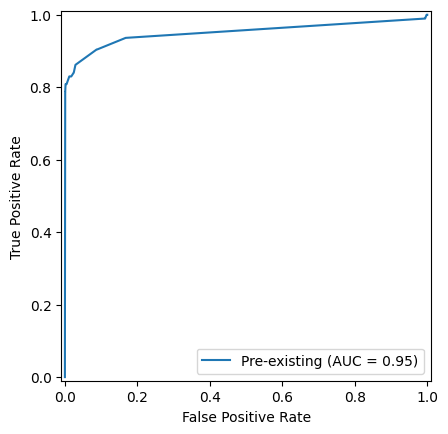

0.9506634625313718


In [11]:
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics

X_train = train_df[predictors]
X_test = test_df[predictors]
X_val = valid_df[predictors]
y_train = train_df.drop(predictors, axis=1)
y_test = test_df.drop(predictors, axis=1)
y_val = valid_df.drop(predictors, axis=1)


with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DataConversionWarning)
    classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(EARLY_STOP * 2)])


def show_auc(model, X, y, title):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=title)
    display.plot()
    plt.show()

show_auc(classifier, X_test, y_test, "Pre-existing")
print(classifier.score(X_test, y_test))

In [12]:

from sklearn.model_selection import GridSearchCV

param_grid = {
          'boosting_type': ['gbdt'],
          'objective': ['binary'],
          'metric':['auc'],
          'learning_rate': [0.05, 0.08, 0.001],
          'num_leaves': [7, 5, 8],
          'max_depth': [5, 4, 3, 6],
          'min_child_samples': [100, 200],
          'max_bin': [100, 200],
          'subsample': [0.9, 0.8],
          'subsample_freq': [1],
          'colsample_bytree': [0.7],
          'min_child_weight': [0],
          'min_split_gain': [0],
          'nthread': [8],
          'verbose': [-1],
          'scale_pos_weight':[150, 200, 250],
}
estimator = AUCLGBMClassifier()


In [13]:
import sys
import os
import contextlib


@contextlib.contextmanager
def suppress_all_stderr(nop=False):

    if nop:
        yield
        return

    with open(os.devnull, 'w') as devnull:
        old_stderr_fd = os.dup(2)
        os.dup2(devnull.fileno(), 2)
        try:
            yield
        finally:
            os.dup2(old_stderr_fd, 2)
            os.close(old_stderr_fd)

with suppress_all_stderr():
    gbm = GridSearchCV(estimator, param_grid, cv=3, verbose=0, n_jobs=-1)
    result = gbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(EARLY_STOP * 2, verbose=False)])

/home/meowxiik/Cloud/College/ikm_fraud_finetuning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/meowxiik/Cloud/College/ikm_fraud_finetuning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/meowxiik/Cloud/College/ikm_fraud_finetuning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.9775811547158855


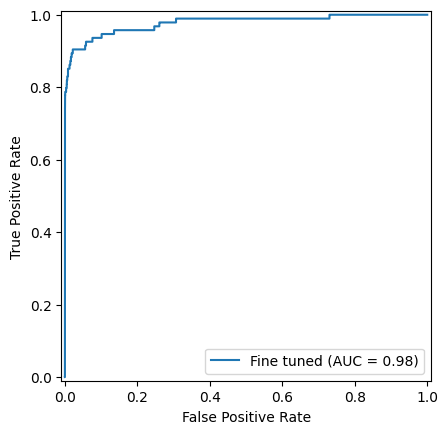

In [14]:
import matplotlib.pyplot as plt
from sklearn import metrics

be = gbm.best_estimator_
print(gbm.best_estimator_.score(X_test, y_test))
show_auc(be, X_test, y_test, "Fine tuned")

## Conclusion

The fine tuning managed to improve the performance quite close to perfect.